# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
appid = weather_api_key
url = f"{base_url}appid={weather_api_key}&units={units}"
url

'http://api.openweathermap.org/data/2.5/weather?appid=832a1bedff65a9f621d36ca0a377cdd9&units=imperial'

In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    
    try:
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        record = record + 1
        
    except:
        print("City not found. Skipping...")
    continue
        

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 | Maragogi
Processing Record 2 | Guerrero Negro
Processing Record 3 | Atuona
City not found. Skipping...
Processing Record 4 | Omsukchan
Processing Record 5 | Matara
Processing Record 6 | Rikitea
Processing Record 7 | Kaitangata
Processing Record 8 | Qaanaaq
Processing Record 9 | Ancud
Processing Record 10 | Camacupa
Processing Record 11 | Bilibino
Processing Record 12 | Vaini
Processing Record 13 | Benicarló
Processing Record 14 | Srednekolymsk
Processing Record 15 | Flinders
Processing Record 16 | Punta Arenas
Processing Record 17 | Avarua
Processing Record 18 | Sandwick
Processing Record 19 | Launceston
Processing Record 20 | Albany
Processing Record 21 | Ponta do Sol
Processing Record 22 | Busselton
Processing Record 23 | Dunedin
Processing Record 24 | Kaseda-shirakame
Processing Record 25 | Hilo
Processing Record 26 | Saldanha
Processing Record 27 | Kapaa
Processing Record 28 | C

Processing Record 232 | Maun
Processing Record 233 | Polohy
Processing Record 234 | Yei
Processing Record 235 | Coari
City not found. Skipping...
Processing Record 236 | Cabo San Lucas
Processing Record 237 | Ponta Delgada
Processing Record 238 | Iqaluit
Processing Record 239 | Nikolskoye
City not found. Skipping...
Processing Record 240 | Sabang
Processing Record 241 | Aklavik
Processing Record 242 | Chabahar
Processing Record 243 | Imeni Poliny Osipenko
Processing Record 244 | Labuhan
Processing Record 245 | Natal
Processing Record 246 | Cidreira
Processing Record 247 | Zile
Processing Record 248 | Sabha
Processing Record 249 | Pemagatsel
Processing Record 250 | Pombas
Processing Record 251 | Svit
Processing Record 252 | Qurayyat
Processing Record 253 | Gigmoto
Processing Record 254 | Seoul
City not found. Skipping...
Processing Record 255 | Bundaberg
Processing Record 256 | Alekseyevka
Processing Record 257 | General Roca
Processing Record 258 | Gusau
Processing Record 259 | Urucará

Processing Record 468 | Lubao
Processing Record 469 | Paracuru
Processing Record 470 | Ostashkov
Processing Record 471 | Esim
Processing Record 472 | Cayenne
Processing Record 473 | Ulladulla
Processing Record 474 | Dalvik
Processing Record 475 | San Quintín
Processing Record 476 | Wennigsen
Processing Record 477 | Cadillac
Processing Record 478 | Tiksi
Processing Record 479 | Chaplynka
Processing Record 480 | Port Hedland
Processing Record 481 | San Cristobal
Processing Record 482 | Tilichiki
Processing Record 483 | Belaya Gora
Processing Record 484 | Iracoubo
Processing Record 485 | Dudinka
Processing Record 486 | Alta Floresta
Processing Record 487 | Sīta Road
Processing Record 488 | Mareeba
Processing Record 489 | Ailigandí
Processing Record 490 | Assiut
Processing Record 491 | Kuytun
City not found. Skipping...
Processing Record 492 | Neuquén
Processing Record 493 | Tefé
Processing Record 494 | Kushmurun
Processing Record 495 | Port Jervis
Processing Record 496 | Ambilobe
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Winde Speed": wind_speed,
    "Country": country,
    "Date": date
}

weatherDF = pd.DataFrame(weather_dict)


# Save data frame to CSV
weatherDF.to_csv('../Resources/weather.csv')

# Display data frame head 
weatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Winde Speed,Country,Date
0,Maragogi,-9.01,-35.22,77.65,78,0,18.28,BR,1603750586
1,Guerrero Negro,27.98,-114.06,74.93,37,2,17.92,MX,1603750927
2,Atuona,-9.80,-139.03,79.12,72,90,20.38,PF,1603750585
3,Omsukchan,62.53,155.80,15.51,94,100,7.45,RU,1603750928
4,Matara,5.95,80.54,77.20,90,73,7.36,LK,1603750928


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humidCities = weatherDF.loc[weatherDF["Humidity"] > 100]
humidCities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Winde Speed,Country,Date


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
print("Since no cities came up with over 100% humidity I am skipping this step")
 

Since no cities came up with over 100% humidity I am skipping this step


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

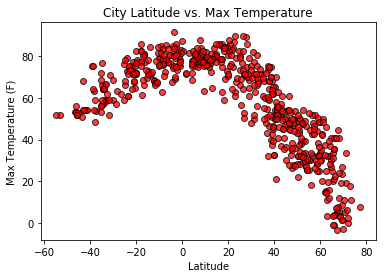

In [35]:
#Lat = weatherDF.loc[weatherDF["Lat"]]
#Temp = weatherDF.loc[weatherDF["Max Temp"]]
#Lat

plt.scatter(weatherDF["Lat"], weatherDF["Max Temp"], facecolors = "red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.savefig("../Latitude vs. Temperature.png")

## Latitude vs. Humidity Plot

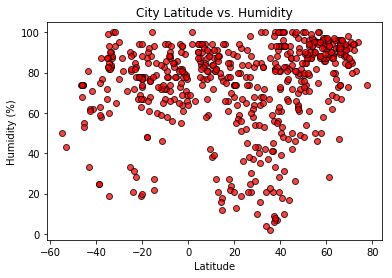

In [34]:
plt.scatter(weatherDF["Lat"], weatherDF["Humidity"], facecolors = "red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.savefig("../Latitude vs. Humidity.png")

## Latitude vs. Cloudiness Plot

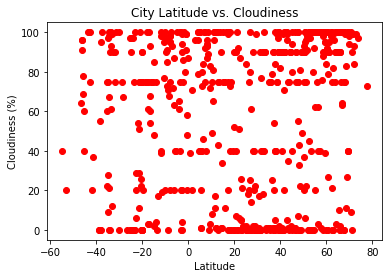

In [32]:
plt.scatter(weatherDF["Lat"], weatherDF["Cloudiness"], marker="o", facecolors="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.savefig("../Latitude vs. Cloudiness.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

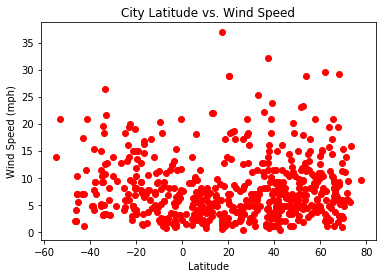

In [33]:
plt.scatter(weatherDF["Lat"], weatherDF["Winde Speed"], marker="o", facecolors="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.savefig("../Latitude vs. Wind Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

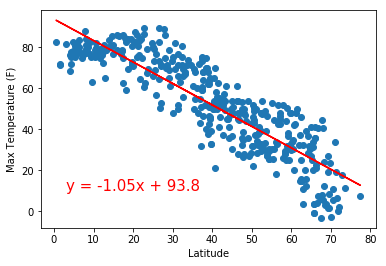

In [36]:
NorthernHem = weatherDF.loc[weatherDF["Lat"] > 0]
x_values = NorthernHem["Lat"]
y_values = NorthernHem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../Northern Hemisphere - Max Temp vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

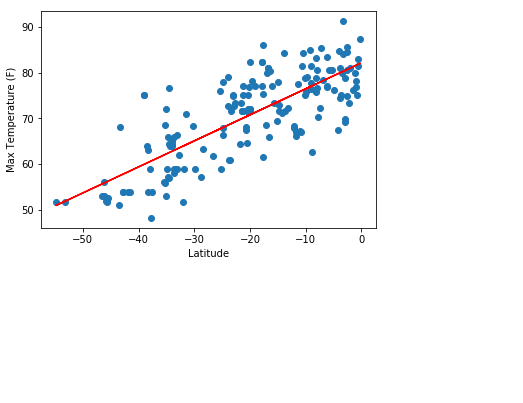

In [37]:
SouthernHem = weatherDF.loc[weatherDF["Lat"] < 0]
x_values = SouthernHem["Lat"]
y_values = SouthernHem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../Southern Hemisphere - Max Temp vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

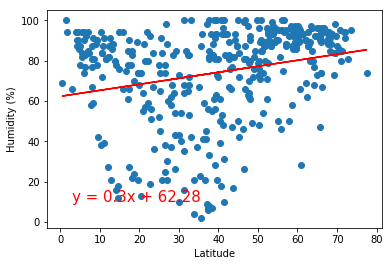

In [38]:
NorthernHem = weatherDF.loc[weatherDF["Lat"] > 0]
x_values = NorthernHem["Lat"]
y_values = NorthernHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../Northern Hemisphere - Humidity vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

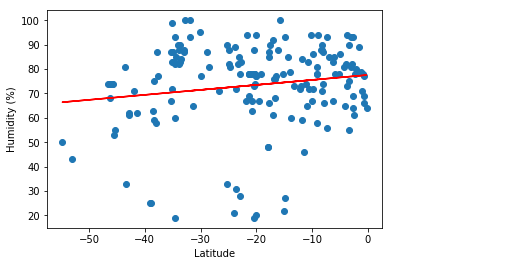

In [39]:
SouthernHem = weatherDF.loc[weatherDF["Lat"] < 0]
x_values = SouthernHem["Lat"]
y_values = SouthernHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../Southern Hemisphere - Humidity vs. Latitude.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

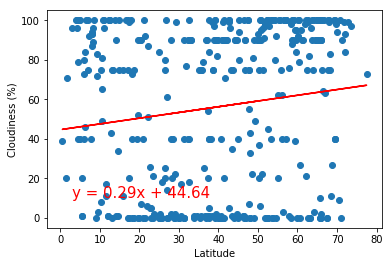

In [40]:
NorthernHem = weatherDF.loc[weatherDF["Lat"] > 0]
x_values = NorthernHem["Lat"]
y_values = NorthernHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../Northern Hemisphere - Cloudiness vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

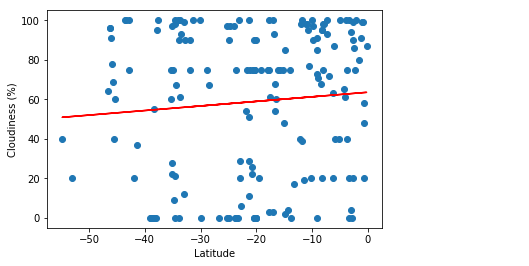

In [42]:
SouthernHem = weatherDF.loc[weatherDF["Lat"] < 0]
x_values = SouthernHem["Lat"]
y_values = SouthernHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../Southern Hemisphere - Cloudiness vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

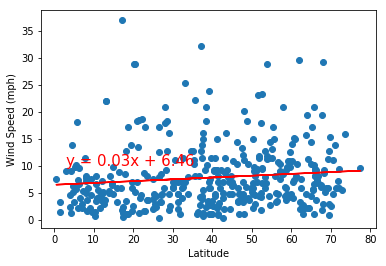

In [48]:
NorthernHem = weatherDF.loc[weatherDF["Lat"] > 0]
x_values = NorthernHem["Lat"]
y_values = NorthernHem['Winde Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../Northern Hemisphere - Wind Speed vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

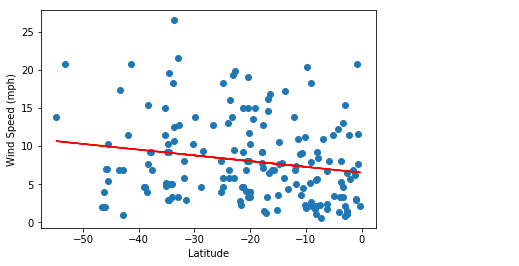

In [47]:
SouthernHem = weatherDF.loc[weatherDF["Lat"] < 0]
x_values = SouthernHem["Lat"]
y_values = SouthernHem['Winde Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../Southern Hemisphere - Wind Speed vs. Latitude.png")
plt.show()

In [46]:
weatherDF.to_csv("../WeatherData.csv", index=True)